In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [2]:
data = pd.read_csv( 'data_small.csv')

In [3]:
#import temperature dependent and independent phonon ban centre (average frequency) data

#fav = temperature independent
fav = np.array(data['fav'])
fav = fav.reshape(-1, 1) 

#fav_RT = temperature dependent (room temperature)
fav_RT = np.array(data['298'])
fav_RT = fav_RT.reshape(-1, 1)

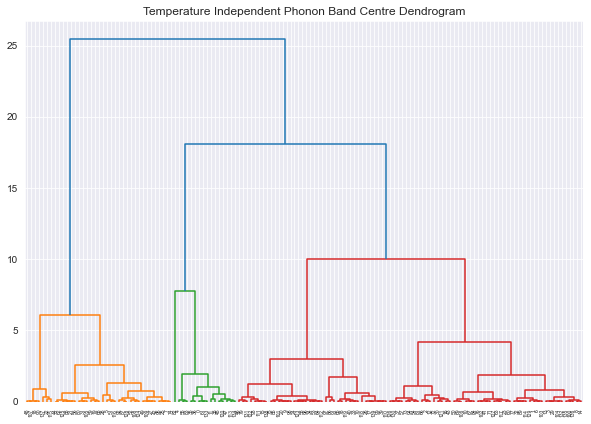

In [4]:
#Perform the Hierarchical Clustering
#temperature independent - clusters_1
plt.figure(figsize=(10, 7))
plt.title("Temperature Independent Phonon Band Centre Dendrogram")

selected_data = fav
clusters_1 = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters_1)
plt.show()

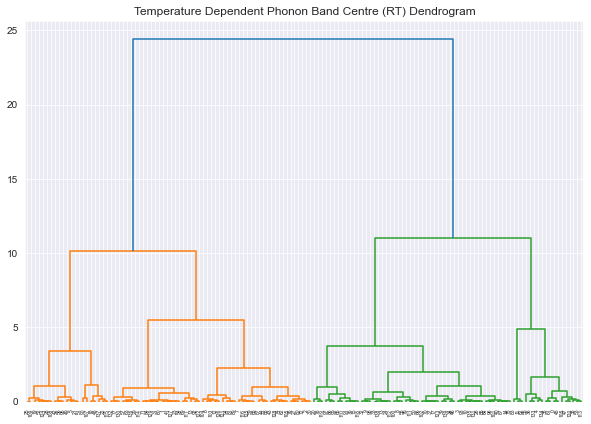

In [5]:
#Perform the Hierarchical Clustering
#temperature dependent (room temperature) - clusters_2
plt.figure(figsize=(10, 7))
plt.title("Temperature Dependent Phonon Band Centre (RT) Dendrogram")

selected_data = fav_RT
clusters_2 = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters_2)
plt.show()

height of that horizontal line tells you about the distance at which this label was merged into another label or cluster

check the Cophenetic Correlation Coefficient , compares (correlates) the actual pairwise distances of all your samples to those implied by the hierarchical clustering. The closer the value is to 1, the better the clustering preserves the original distances

In [6]:
c, coph_dists = cophenet(clusters_1, pdist(fav))
c

0.6638775751658679

In [7]:
c, coph_dists = cophenet(clusters_2, pdist(fav_RT))
c

0.6337040209885303

In [8]:
def var_n_clusters (mini, maxi, column):
    '''give a list of variance with different number of clusters used in Hierarchical Clustering'''
    
    temp = pd.DataFrame(data[column])
    val = np.array(data[column])
    val = val.reshape(-1, 1)
    n_range = [*range(mini, maxi+1)]
    store = pd.DataFrame(data = n_range, columns = ['n_clusters'])
    store['sum_var']=np.nan
    
    for n in n_range:
        clustering_model = AgglomerativeClustering(n, affinity='euclidean', linkage='ward').fit(val)
        label = clustering_model.labels_
        label = pd.DataFrame(label)
        label.columns = ['label']
        temp = pd.concat([temp, label], axis = 1)
        record = pd.DataFrame(data = [*range(0,n)])
        for label in [*range(0,n)]:
            record.loc[label,1] = temp.loc[temp['label']== label][column].var()
        record.columns = ['label','variance']
        sum_var = record['variance'].sum()
        index = store.index[store['n_clusters'] == n].tolist()
        store.at[index[0],'sum_var'] = sum_var
        temp = temp.drop('label', axis=1)
    
    return store

In [9]:
var_n_clusters(2,10,'fav')

,n_clusters,sum_var
0,2,3.259734
1,3,3.642669
2,4,3.279106
3,5,1.287998
4,6,0.872385
5,7,0.755580
6,8,0.726280
7,9,0.656759
8,10,0.547358


In [10]:
var_n_clusters(2,10,'298')

,n_clusters,sum_var
0,2,2.364490
1,3,2.117221
2,4,1.767529
3,5,1.541285
4,6,0.874779
5,7,0.794402
6,8,0.604893
7,9,0.535798
8,10,0.509734


Clusters_1 - Temperature independent

In [11]:
clustering_model_1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clustering_model_1.fit(fav)
res_1 = clustering_model_1.labels_
res_1 = pd.DataFrame(res_1)
res_1.columns = ['res_fav']
data = pd.concat([data, res_1], axis = 1)
data

,Unnamed: 0,task_id,pretty_formula,fav,298,400,500,600,700,800,900,first_f_a,relative_w,res_fav
0,0,mp-15788,LiYS2,6.202698,5.830757,5.837647,5.841635,5.844279,5.846159,5.847566,5.848657,0.072377,1.0,2
1,1,mp-996962,LiAgO2,10.015853,8.664702,8.701859,8.723256,8.737392,8.747425,8.754915,8.760719,0.072377,1.0,0
2,2,mp-23818,BaLiH3,10.604209,9.834129,9.857356,9.870780,9.879667,9.885985,9.890706,9.894367,0.072377,1.0,0
3,3,mp-5840,LiScO2,9.787954,7.522111,7.576124,7.607432,7.628196,7.642973,7.654025,7.662603,0.072377,1.0,0
4,4,mp-33526,LiBiS2,5.534439,5.222082,5.227304,5.230326,5.232329,5.233754,5.234819,5.235646,0.072377,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,135,mp-961698,LiZnP,9.613426,7.592647,7.642841,7.671675,7.690696,7.704182,7.714243,7.722036,0.072377,1.0,0
136,136,mp-3731,LiNbO3,9.629222,8.785166,8.808411,8.821815,8.830677,8.836970,8.841670,8.845314,0.072377,1.0,0
137,137,mp-7611,Li2CaGeO4,13.180677,11.515282,11.576673,11.611680,11.634665,11.650912,11.663004,11.672353,0.072377,1.0,1
138,138,mp-8405,Li3LaSb2,8.907796,7.856691,7.883062,7.898248,7.908280,7.915401,7.920717,7.924837,0.072377,1.0,0


Clusters_2 - Temperature dependent (room temperature)

In [13]:
clustering_model_2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clustering_model_2.fit(fav_RT)
res_2 = clustering_model_2.labels_
res_2 = pd.DataFrame(res_2)
res_2.columns = ['res_favRT']
data = pd.concat([data, res_2], axis = 1)
data

,Unnamed: 0,task_id,pretty_formula,fav,298,400,500,600,700,800,900,first_f_a,relative_w,res_fav,res_favRT
0,0,mp-15788,LiYS2,6.202698,5.830757,5.837647,5.841635,5.844279,5.846159,5.847566,5.848657,0.072377,1.0,2,0
1,1,mp-996962,LiAgO2,10.015853,8.664702,8.701859,8.723256,8.737392,8.747425,8.754915,8.760719,0.072377,1.0,0,1
2,2,mp-23818,BaLiH3,10.604209,9.834129,9.857356,9.870780,9.879667,9.885985,9.890706,9.894367,0.072377,1.0,0,1
3,3,mp-5840,LiScO2,9.787954,7.522111,7.576124,7.607432,7.628196,7.642973,7.654025,7.662603,0.072377,1.0,0,0
4,4,mp-33526,LiBiS2,5.534439,5.222082,5.227304,5.230326,5.232329,5.233754,5.234819,5.235646,0.072377,1.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,135,mp-961698,LiZnP,9.613426,7.592647,7.642841,7.671675,7.690696,7.704182,7.714243,7.722036,0.072377,1.0,0,0
136,136,mp-3731,LiNbO3,9.629222,8.785166,8.808411,8.821815,8.830677,8.836970,8.841670,8.845314,0.072377,1.0,0,1
137,137,mp-7611,Li2CaGeO4,13.180677,11.515282,11.576673,11.611680,11.634665,11.650912,11.663004,11.672353,0.072377,1.0,1,1
138,138,mp-8405,Li3LaSb2,8.907796,7.856691,7.883062,7.898248,7.908280,7.915401,7.920717,7.924837,0.072377,1.0,0,0


In [15]:
data.to_csv('clustering_small.csv')

In [16]:
print(var_n_clusters(2,10,'400'))
print(var_n_clusters(2,10,'500'))
print(var_n_clusters(2,10,'600'))
print(var_n_clusters(2,10,'700'))
print(var_n_clusters(2,10,'800'))
print(var_n_clusters(2,10,'900'))

   n_clusters   sum_var
0           2  2.353298
1           3  2.110129
2           4  1.759328
3           5  1.525018
4           6  0.933768
5           7  0.728716
6           8  0.678382
7           9  0.594308
8          10  0.528614
   n_clusters   sum_var
0           2  2.260919
1           3  1.967061
2           4  1.718808
3           5  1.186235
4           6  0.938854
5           7  0.717630
6           8  0.610483
7           9  0.551405
8          10  0.522745
   n_clusters   sum_var
0           2  2.241318
1           3  1.917994
2           4  1.617061
3           5  1.363795
4           6  0.825489
5           7  0.744708
6           8  0.635680
7           9  0.581609
8          10  0.529086
   n_clusters   sum_var
0           2  2.237731
1           3  1.942767
2           4  1.705053
3           5  1.240266
4           6  0.983744
5           7  0.750006
6           8  0.654378
7           9  0.628728
8          10  0.575821
   n_clusters   sum_var
0           2  2